<a href="https://colab.research.google.com/github/Charlsz/optimizacion_202503/blob/main/Copy_Class_of_OPT_PRE_202530_Taylor1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## 🧠 Symbolic Computation with SymPy – Notebook Examples

### ✅ Setup

```python
# Install SymPy if not already installed
!pip install sympy
```



In [ ]:
!pip install sympy

📌 1. Taylor Series of sin(x) around x = 0

In [ ]:
from sympy import symbols, sin, series

x = symbols('x')
f = exp(x)
taylor = series(f, x, 0, 6)  # up to x^5 (6th order includes O(x^6))
taylor

x - x**3/6 + x**5/120 + O(x**6)

```python
taylor = series(f, x, 0, 6)
```

This uses `sympy.series()` to generate a **Taylor (Maclaurin) series expansion** of a symbolic function.

---

## 📘 Function: `series(f, x, x0, n)`

### ▶️ `f`

* The **symbolic function** you want to expand.
* Example: `f = exp(x)`, `f = sin(x)`, `f = ln(1 + x)`

### ▶️ `x`

* The **symbol** (variable) with respect to which you're expanding.
* Usually defined with: `x = symbols('x')`

### ▶️ `0`

* The **expansion point** (also called the center).
* `0` means a **Maclaurin series** (Taylor series centered at `x = 0`)
* You can use any real number, like `series(f, x, 1, 6)` to expand around `x = 1`.

### ▶️ `6`

* The **order of the expansion**.
* It means the series will include terms up to $(x - x_0)^5$, and show an $O((x - x_0)^6)$ remainder term.
* It includes $n - 1$ terms of the polynomial, plus the "big O" term representing the error.

---

## 🧠 Example Breakdown:

```python
taylor = series(exp(x), x, 0, 6)
```

This produces:

$$
e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \frac{x^5}{5!} + O(x^6)
$$

So:

* Center: $x_0 = 0$
* Degree: up to 5 (since we asked for 6th order)
* Result includes the error term $O(x^6)$


📌 2. Symbolic Derivative of exp(x) * sin(x)

In [ ]:
from sympy import exp, diff

f = exp(x) * sin(x)
dfdx = diff(f, x)
dfdx


exp(x)*sin(x) + exp(x)*cos(x)

In [ ]:
for k in range(1,10):
  dfdx = diff(dfdx, x, k)
  print(dfdx)

2*exp(x)*cos(x)
-4*exp(x)*sin(x)
8*(sin(x) - cos(x))*exp(x)
-32*(sin(x) - cos(x))*exp(x)
256*exp(x)*sin(x)
-2048*exp(x)*cos(x)
-16384*(sin(x) + cos(x))*exp(x)
-262144*(sin(x) + cos(x))*exp(x)
-8388608*exp(x)*cos(x)


📌 3. Symbolic Integral of exp(x) * sin(x)

In [ ]:
from sympy import integrate

integral = integrate(f, x)
integral


exp(x)*sin(x)/2 - exp(x)*cos(x)/2

📌 4. Lambdify and Plot: sin(x) vs Taylor Approximation

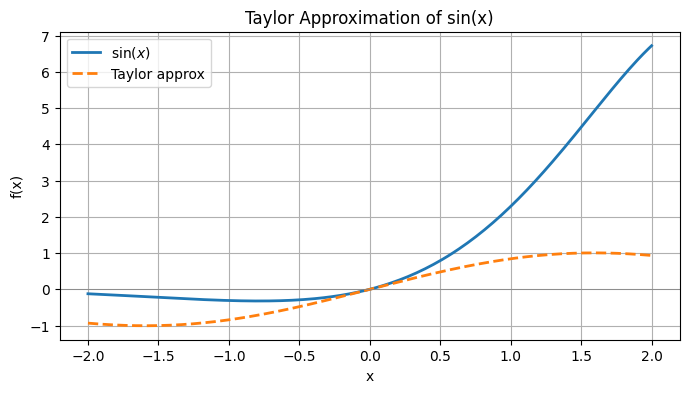

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify

# Remove the big O term from the Taylor series
taylor_clean = taylor.removeO()

# Convert symbolic expressions to numerical functions
f_numeric = lambdify(x, f, modules=["numpy"])
taylor_numeric = lambdify(x, taylor_clean, modules=["numpy"])

# Prepare values
X = np.linspace(-2, 2, 200)
Y_true = f_numeric(X)
Y_approx = taylor_numeric(X)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(X, Y_true, label=r"$\sin(x)$", linewidth=2)
plt.plot(X, Y_approx, '--', label="Taylor approx", linewidth=2)
plt.axhline(0, color='gray', linewidth=0.5)
plt.title("Taylor Approximation of sin(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


📈 $\exp(x)$

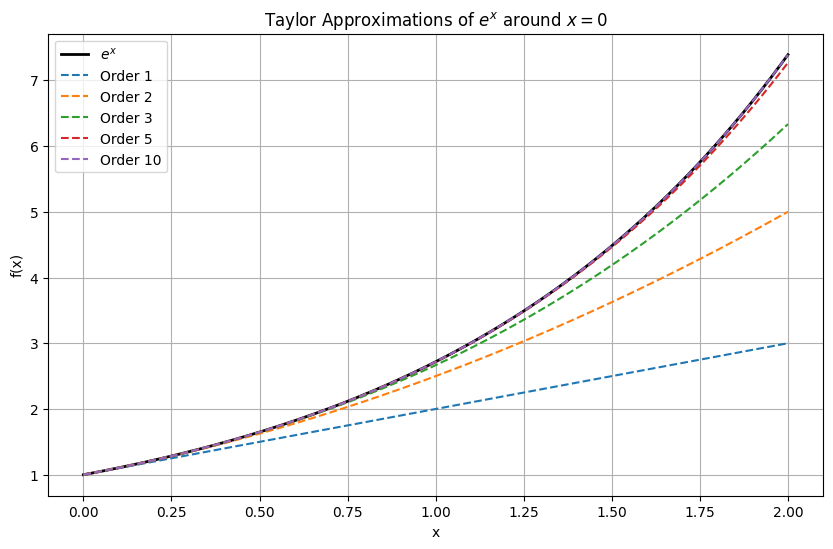

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, exp, series, lambdify

# Symbol and function
x = symbols('x')
f = exp(x)

# Valores de n a comparar
orders = [1, 2, 3, 5, 10]

# Función original
f_numeric = lambdify(x, f, modules=["numpy"])

# Valores de x para graficar
X = np.linspace(0, 2, 300)
Y_true = f_numeric(X)

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar la función original
plt.plot(X, Y_true, label=r"$e^x$", color="black", linewidth=2)

# Graficar las aproximaciones de Taylor para diferentes órdenes
for n in orders:
    taylor_n = series(f, x, 0, n+1).removeO()
    taylor_numeric = lambdify(x, taylor_n, modules=["numpy"])
    plt.plot(X, taylor_numeric(X), '--', label=fr"Order {n}")

# Formato del gráfico
plt.title("Taylor Approximations of $e^x$ around $x=0$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
